In [29]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('./spam.csv', encoding='iso-8859-1')


In [19]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Structure
### 1. Data cleaning
### 2. EDA
### 3. Text preprocessing
### 4. Model building
### 5. Evaluation
### 6. Improvment
### 7. Website 
### 8. Deploy

## 1. data cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# drop last 3 cols
data.drop(data.columns[2: 5], axis=1, inplace=True)

In [20]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# renaming the cols
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.sample(5)

,target,text
1915,ham,Its not that time of the month nor mid of the ...
2341,ham,Tell dear what happen to you. Why you talking ...
391,ham,Hey so this sat are we going for the intro pil...
337,ham,Just sleeping..and surfing
5127,ham,Cuz ibored. And don wanna study


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
# check for duplicate values
data.duplicated().sum()

403

In [39]:
# remove duplicated values
data = data.drop_duplicates(keep='first')

In [40]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
data.shape

(5169, 2)

## 2. EDA

In [43]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

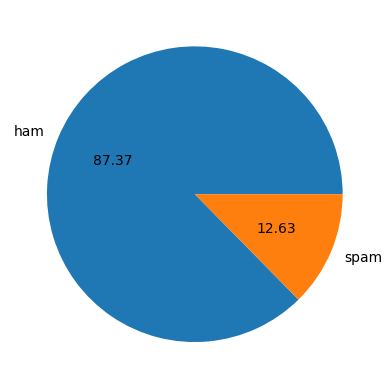

In [48]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()